In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve,roc_auc_score

In [9]:
df = pd.read_csv(r"D:\csv\Test set.csv")

In [10]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [12]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


Blue:Female , Red:Male


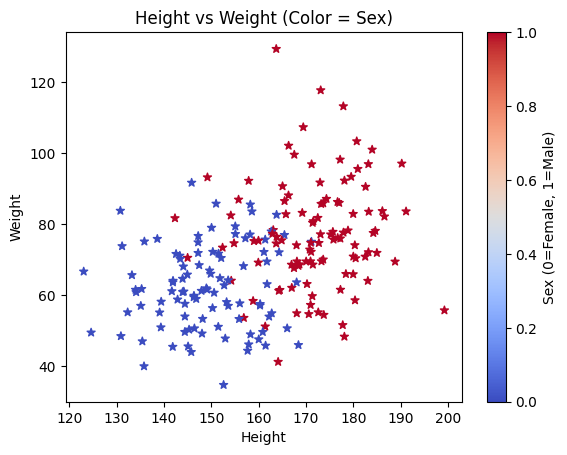

In [27]:
print("Blue:Female , Red:Male")
plt.scatter(df.Height, df.Weight, c=df.Sex, cmap='coolwarm', marker='*')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight (Color = Sex)")
plt.colorbar(label='Sex (0=Female, 1=Male)')
plt.show()

In [14]:
df.shape

(205, 3)

In [15]:
from sklearn.model_selection import train_test_split
X = df[['Height','Weight']]
Y = df['Sex']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
X_train

,Height,Weight
1,175.695412,77.863687
49,152.079179,70.499200
163,180.515927,70.424884
69,169.436835,107.358139
150,141.857372,63.648645
...,...,...
25,150.253687,56.382121
193,154.115917,82.493272
22,170.228071,63.162462
198,133.209970,65.671138


In [17]:
Y_train


1      1
49     0
163    1
69     1
150    0
      ..
25     0
193    1
22     1
198    0
77     1
Name: Sex, Length: 164, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [21]:
model.score(X_test,Y_test)

0.8048780487804879

In [22]:
model.predict_proba(X_test)

array([[1.35602765e-02, 9.86439724e-01],
       [5.04909408e-03, 9.94950906e-01],
       [3.85148883e-01, 6.14851117e-01],
       [1.21947796e-01, 8.78052204e-01],
       [3.76889701e-01, 6.23110299e-01],
       [8.76141441e-01, 1.23858559e-01],
       [3.33616762e-01, 6.66383238e-01],
       [8.98733178e-01, 1.01266822e-01],
       [9.65891563e-01, 3.41084367e-02],
       [9.95568625e-01, 4.43137454e-03],
       [3.75862864e-01, 6.24137136e-01],
       [2.34239264e-01, 7.65760736e-01],
       [1.29606982e-04, 9.99870393e-01],
       [9.96980147e-01, 3.01985309e-03],
       [4.22704585e-02, 9.57729541e-01],
       [9.94815632e-01, 5.18436813e-03],
       [6.46790349e-04, 9.99353210e-01],
       [9.54492433e-04, 9.99045508e-01],
       [8.80202339e-04, 9.99119798e-01],
       [9.77981209e-01, 2.20187906e-02],
       [5.89025420e-02, 9.41097458e-01],
       [1.18766651e-03, 9.98812333e-01],
       [1.02107381e-01, 8.97892619e-01],
       [7.78811122e-02, 9.22118888e-01],
       [3.106987

In [23]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

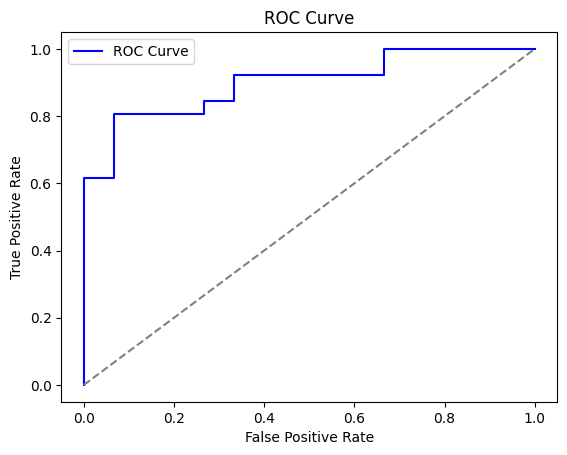

In [24]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [25]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.9
